<a href="https://colab.research.google.com/github/RajnishGautam/CodXo/blob/main/Task_4_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CODXO INTERNSHIP**

Intermediate Project: Sentiment Analysis

AUTHOR: Rajnish Kumar

DOMAIN : Data Science

**Problem Statement**

Our goal is to analyse the sentiments expressed in Twitter tweets and classify them as positive, negative, or neutral. We will leverage machine learning techniques to build a sentiment analysis model that can automatically classify tweets based on their sentiment.

#Step 1: Import Necessary Libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re


In [28]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Step 2: Load and Explore the Dataset

In [27]:
data = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\t' , quoting=3)

In [3]:
data.shape

(1000, 2)

In [4]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [79]:
data.head()

,Review,Liked,Cleaned_Review,Review_Length
0,Wow... Loved this place.,1,wow loved place,24
1,Crust is not good.,0,crust good,18
2,Not tasty and the texture was just nasty.,0,tasty texture nasty,41
3,Stopped by during the late May bank holiday of...,1,stopped late may bank holiday rick steve recom...,87
4,The selection on the menu was great and so wer...,1,selection menu great price,59


In [6]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [30]:
# Step 2: Data Cleaning
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    text = text.strip()
    return text


In [31]:
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [33]:
def preprocess_text(text):
    text = clean_text(text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

data['Cleaned_Review'] = data['Review'].apply(preprocess_text)

#**Step 3 :Exploratory Data Analysis**




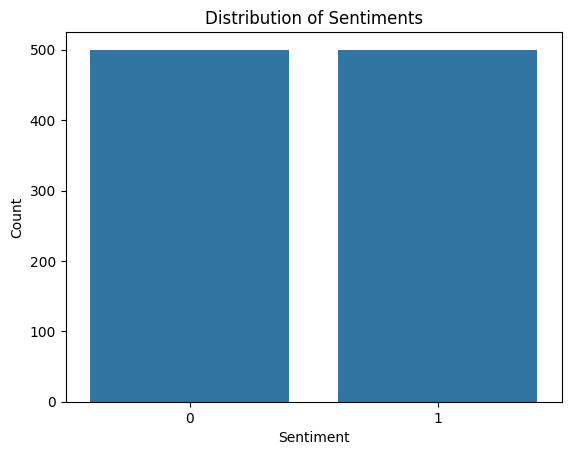

In [36]:
# Step 3: Exploratory Data Analysis (EDA)
sns.countplot(x='Liked', data=data)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

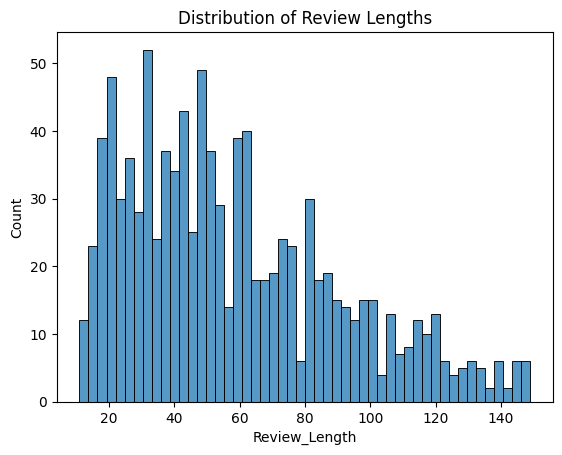

In [38]:
# Additional EDA: Review Length Distribution
data['Review_Length'] = data['Review'].apply(len)
sns.histplot(data['Review_Length'], bins=50)
plt.title('Distribution of Review Lengths')
plt.show()

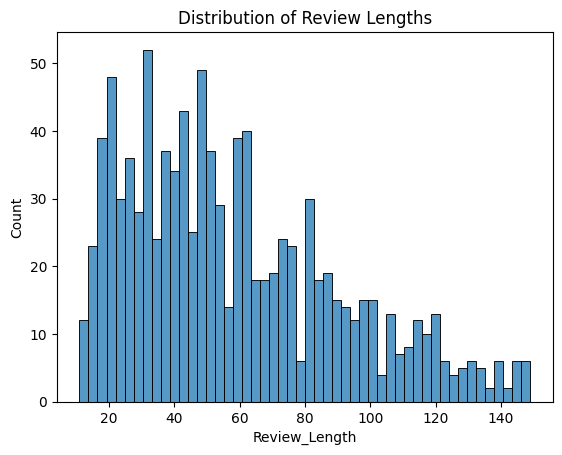

In [51]:
# Additional EDA: Review Length Distribution
data['Review_Length'] = data['Review'].apply(len)
sns.histplot(data['Review_Length'], bins=50)
plt.title('Distribution of Review Lengths')
plt.show()

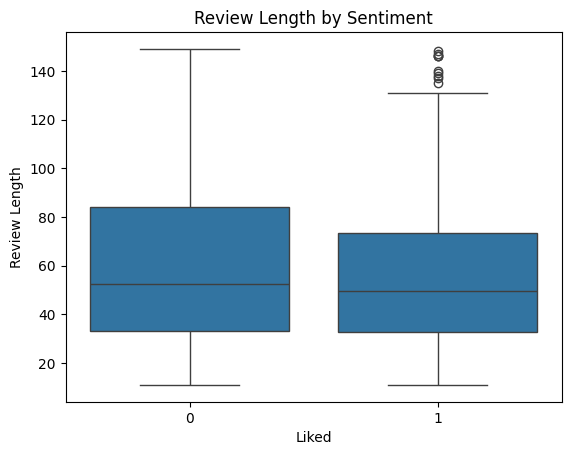

In [53]:
# Review Length by Sentiment
sns.boxplot(x='Liked', y='Review_Length', data=data)
plt.xlabel('Liked')
plt.ylabel('Review Length')
plt.title('Review Length by Sentiment')
plt.show()

In [55]:
# Word Cloud for Positive and Negative Reviews
positive_reviews = ' '.join(data[data['Liked'] == 1]['Cleaned_Review'])
negative_reviews = ' '.join(data[data['Liked'] == 0]['Cleaned_Review'])

In [58]:
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

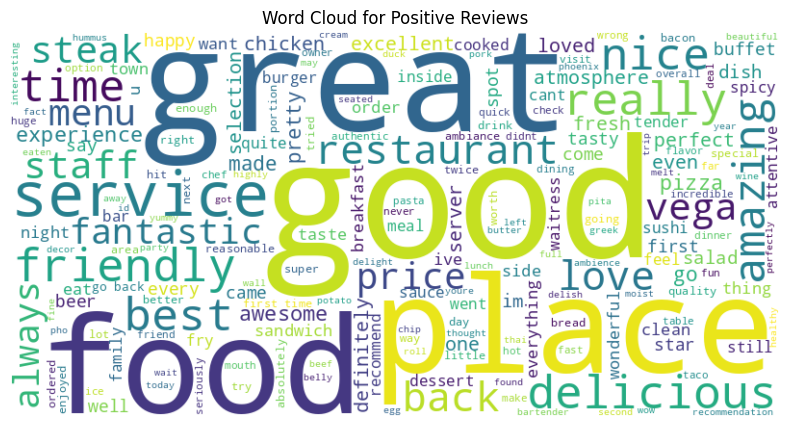

In [59]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

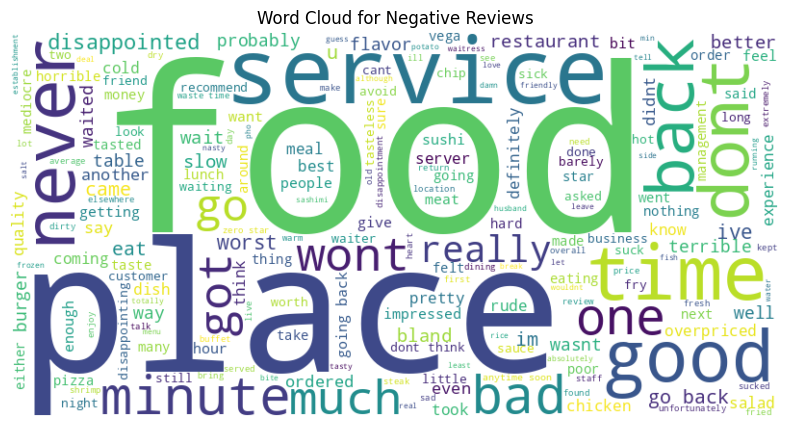

In [60]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

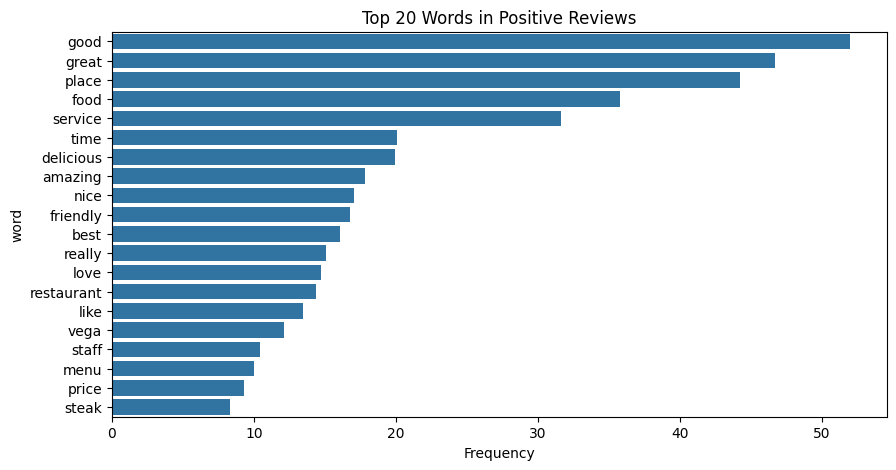

In [65]:

import seaborn as sns

def plot_top_n_words(reviews, top_n, title):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=top_n)
    tfidf_matrix = vectorizer.fit_transform(reviews)
    sum_words = tfidf_matrix.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]

    # Create a DataFrame from words and frequencies
    df = pd.DataFrame(words_freq, columns=['word', 'frequency'])

    plt.figure(figsize=(10, 5))
    # Use the DataFrame to create the barplot
    sns.barplot(x='frequency', y='word', data=df)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.show()

plot_top_n_words(data[data['Liked'] == 1]['Cleaned_Review'], 20, 'Top 20 Words in Positive Reviews')


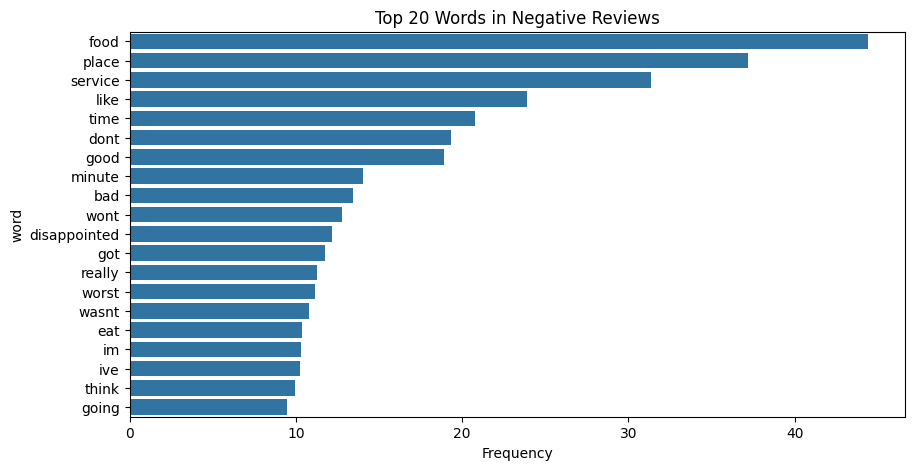

In [66]:
plot_top_n_words(data[data['Liked'] == 0]['Cleaned_Review'], 20, 'Top 20 Words in Negative Reviews')

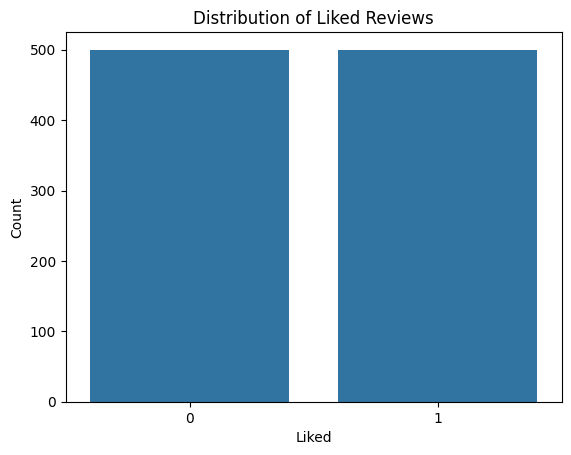

In [48]:
# Distribution of sentiments
sns.countplot(x='Liked', data=data)
plt.xlabel('Liked')
plt.ylabel('Count')
plt.title('Distribution of Liked Reviews')
plt.show()

#**Step 4: Feature Extraction**

In [41]:
X = data['Cleaned_Review']
y = data['Liked']

#**Step 5: Split the Data into Training and Testing Sets**

In [42]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Step 6: Model Building and Evaluation**

**Logistic Regression Model**

****

In [67]:
pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', LogisticRegression(max_iter=1000))
])

pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

print('--- Logistic Regression ---')
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.2f}")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print('\n')

--- Logistic Regression ---
Accuracy: 0.78
Precision: 0.82
Recall: 0.73
F1-Score: 0.77
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        96
           1       0.82      0.73      0.77       104

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.77       200

[[79 17]
 [28 76]]




**Naive Bayes Model**

In [68]:
pipeline_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB())
])

pipeline_nb.fit(X_train, y_train)
y_pred_nb = pipeline_nb.predict(X_test)

print('--- Naive Bayes ---')
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_nb):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_nb):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb):.2f}")
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print('\n')

--- Naive Bayes ---
Accuracy: 0.79
Precision: 0.80
Recall: 0.78
F1-Score: 0.79
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        96
           1       0.80      0.78      0.79       104

    accuracy                           0.79       200
   macro avg       0.78      0.79      0.78       200
weighted avg       0.79      0.79      0.79       200

[[76 20]
 [23 81]]




**Support Vector Machine Model**

In [69]:
pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', SVC(kernel='linear'))
])

pipeline_svm.fit(X_train, y_train)
y_pred_svm = pipeline_svm.predict(X_test)

print('--- Support Vector Machine ---')
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm):.2f}")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print('\n')


--- Support Vector Machine ---
Accuracy: 0.79
Precision: 0.84
Recall: 0.73
F1-Score: 0.78
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        96
           1       0.84      0.73      0.78       104

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.80      0.79      0.79       200

[[82 14]
 [28 76]]




#Combining all models

In [70]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(kernel='linear')
}

for model_name, model in models.items():
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f'--- {model_name} ---')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('\n')

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        96
           1       0.82      0.73      0.77       104

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.77       200

[[79 17]
 [28 76]]


--- Naive Bayes ---
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        96
           1       0.80      0.78      0.79       104

    accuracy                           0.79       200
   macro avg       0.78      0.79      0.78       200
weighted avg       0.79      0.79      0.79       200

[[76 20]
 [23 81]]


--- Support Vector Machine ---
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        96
           1       0.84      0.73      0.78       104

    accuracy                           0.79       200
   macr

**HEATMAP AND CONFUSION MATRIX**

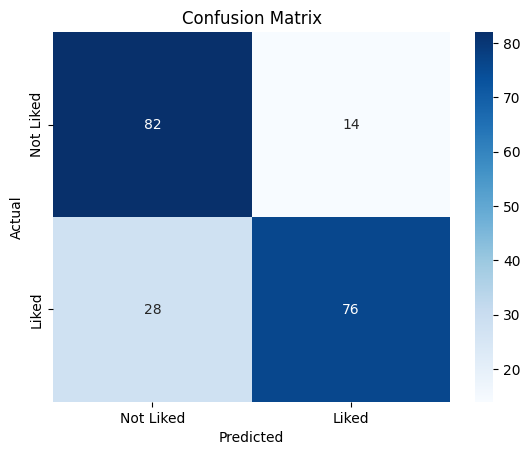

In [72]:
# Visualizing confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Liked', 'Liked'], yticklabels=['Not Liked', 'Liked'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

**Using Corpus**

In [8]:
corpus =[]
for i in range(0,1000):
   review =re.sub(pattern='[^a-zA-Z]',repl=' ', string=data['Review'][i])

   review = review.lower()
   review_words = review.split()
   review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

   ps= PorterStemmer()
   review =[ps.stem(word) for word in review_words]

   review = ' '.join(review)
   corpus.append(review)

In [9]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X =cv.fit_transform(corpus).toarray()
y = data.iloc[:,1].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20, random_state=0)

In [12]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [13]:
from sklearn.naive_bayes import MultinomialNB

classifier =MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [14]:
y_pred = classifier.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [15]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

score1 =accuracy_score(y_test,y_pred)
score2 = accuracy_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("---------SCORES--------")
print("Accuracy score is {}%".format(round(score1*100,3)))
print("Precision score is {}%".format(round(score2*100,3)))
print("recall score is {}%".format(round(score3*100,3)))

---------SCORES--------
Accuracy score is 76.5%
Precision score is 76.5%
recall score is 78.641%


In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [17]:
cm

array([[72, 25],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual Values')

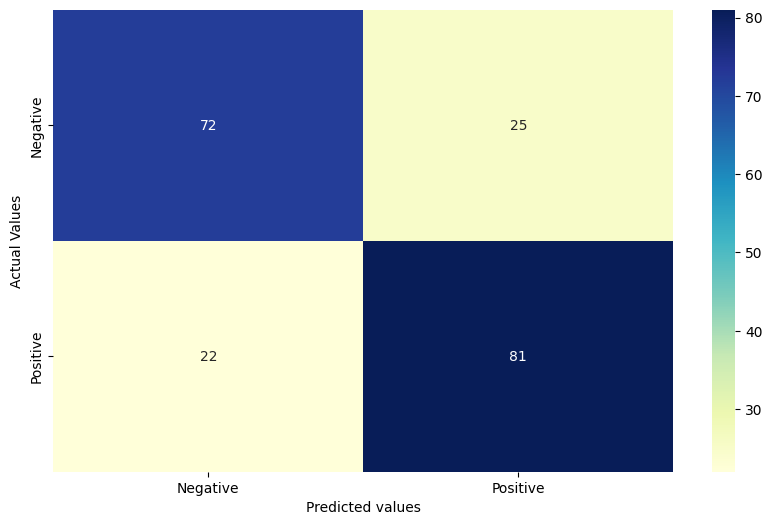

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize =(10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')

In [19]:
from ssl import ALERT_DESCRIPTION_HANDSHAKE_FAILURE
best_accuracy =0.0
alpha_val =0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier =MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,y_train)
  temp_y_pred =temp_classifier.predict(X_test)
  score = accuracy_score(y_test,temp_y_pred)
  print("Accuracy Score for alpha={} is {}%".format(round(i,1),round(score*100,3)))
  if score>best_accuracy:
     best_accuracy=score
     alpha_val =i
print('----------------------------------------------------')
print("The Best Accuracy Score is {}% with alpha value as {}".format(round(best_accuracy*100, 2), round(alpha_val, 1)))

Accuracy Score for alpha=0.1 is 78.0%
Accuracy Score for alpha=0.2 is 78.5%
Accuracy Score for alpha=0.3 is 78.0%
Accuracy Score for alpha=0.4 is 78.0%
Accuracy Score for alpha=0.5 is 77.5%
Accuracy Score for alpha=0.6 is 77.5%
Accuracy Score for alpha=0.7 is 77.5%
Accuracy Score for alpha=0.8 is 77.0%
Accuracy Score for alpha=0.9 is 76.5%
Accuracy Score for alpha=1.0 is 76.5%
----------------------------------------------------
The Best Accuracy Score is 78.5% with alpha value as 0.2


In [20]:
classifier =MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [21]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)

    temp = cv.transform([final_review]).toarray()
    return classifier.predict(temp)

In [22]:
sample_review ='The food is really bad.'

if predict_sentiment(sample_review):
  print("Positive review")

else:
  print("Negative review")

Negative review


In [23]:
sample_review ='The food  was absolutely wonderful,from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
  print("This is a Positive review")

else:
  print("This is a Negative review")

This is a Positive review


In [24]:
sample_review ='server naren is not serving well.'

if predict_sentiment(sample_review):
  print("Positive review")

else:
  print("Negative review")

Negative review


In [80]:
sample_review ='food was good.'

if predict_sentiment(sample_review):
  print("Positive review")

else:
  print("Negative review")

Positive review


In [81]:
sample_review ='food was bad.'

if predict_sentiment(sample_review):
  print("Positive review")

else:
  print("Negative review")

Negative review
